# Thermal Comfort Classifier V2.1
###### by Muhammad Zhafran A F, Danang Wahyu K, and Haidar Alghazian A

What's new?
* Using all features first to evaluate models
* Feature Importance
* Model evaluation using top features in feature importance

## Data Acquisition

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/mzhafranaf/Final-Project-Orbit/main/darjeeling.csv"
# dataset = pd.read_csv(url)
dataset = pd.read_csv("darjeeling.csv")

In [3]:
dataset.head()

,month,season,Location,sex,Subject Code,TSV,TP,air_ts,air_tp,RH_ts,...,PMV,PPD,TnG_R_0.5,Tmr,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33,Unnamed: 32
0,1.0,1.0,S0135,1.0,FSL1,-1.0,-1,0,0,-1.0,...,0.768705,16.575062,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
1,1.0,1.0,S0135,1.0,FSL2,-1.0,-1,-1,0,1.0,...,0.236143,6.148326,26.860770,25.521541,24.860770,18.5,19.238792,28.860770,27.891073,0.0
2,1.0,1.0,S0135,1.0,FSL3,-1.0,-1,-1,0,1.0,...,0.246064,6.246280,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
3,1.0,1.0,S0135,1.0,FSL4,-1.0,-1,-1,0,1.0,...,0.299259,6.838386,26.843366,25.786732,24.843366,18.5,19.238792,28.843366,27.873669,0.0
4,1.0,1.0,S0135,1.0,FSL5,0.0,0,0,0,0.0,...,-0.444504,9.015203,24.755364,25.510728,24.755364,18.5,19.238792,24.755364,24.755364,0.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2608 non-null   float64
 1   season        2608 non-null   float64
 2   Location      2608 non-null   object 
 3   sex           2608 non-null   float64
 4   Subject Code  2608 non-null   object 
 5   TSV           2608 non-null   float64
 6   TP            2608 non-null   object 
 7   air_ts        2608 non-null   object 
 8   air_tp        2608 non-null   object 
 9   RH_ts         2608 non-null   float64
 10  RH_tp         2608 non-null   float64
 11  comfort       2608 non-null   object 
 12  prod          2608 non-null   object 
 13  TA            2608 non-null   object 
 14  clo           2608 non-null   float64
 15  Uphols        2608 non-null   object 
 16  clo_tot       2608 non-null   float64
 17  met           2608 non-null   float64
 18  sh_sw         2608 non-null 

## Data Cleaning

In [5]:
dataset.isnull().sum()

month            400
season           400
Location         400
sex              400
Subject Code     400
TSV              400
TP               400
air_ts           400
air_tp           400
RH_ts            400
RH_tp            400
comfort          400
prod             400
TA               400
clo              400
Uphols           400
clo_tot          400
met              400
sh_sw            400
Ti               400
Tg               400
Va               400
RH               400
PMV              400
PPD              400
TnG_R_0.5        400
Tmr              400
Top              400
Tout             400
Trm              400
TnG_R_0.25       400
TnG_R_0.33       400
Unnamed: 32     2438
dtype: int64

There's unnamed feature that should remove from our data

In [6]:
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2608 non-null   float64
 1   season        2608 non-null   float64
 2   Location      2608 non-null   object 
 3   sex           2608 non-null   float64
 4   Subject Code  2608 non-null   object 
 5   TSV           2608 non-null   float64
 6   TP            2608 non-null   object 
 7   air_ts        2608 non-null   object 
 8   air_tp        2608 non-null   object 
 9   RH_ts         2608 non-null   float64
 10  RH_tp         2608 non-null   float64
 11  comfort       2608 non-null   object 
 12  prod          2608 non-null   object 
 13  TA            2608 non-null   object 
 14  clo           2608 non-null   float64
 15  Uphols        2608 non-null   object 
 16  clo_tot       2608 non-null   float64
 17  met           2608 non-null   float64
 18  sh_sw         2608 non-null 

There's some numeric features that's declared as object type. So, we should convert it to float64 type.

In [7]:
data = dataset.dropna()
#data

In [8]:
# remove Location and Subject Code
data = data.drop(['Location','Subject Code'], axis=1)

In [9]:
objectFeatures = ['TP','air_ts', 'air_tp', 'comfort', 'prod', 'TA', 'Uphols', 'sh_sw']

for i in objectFeatures:
    data[i] = pd.to_numeric(data[i],errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 0 to 2607
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       2608 non-null   float64
 1   season      2608 non-null   float64
 2   sex         2608 non-null   float64
 3   TSV         2608 non-null   float64
 4   TP          2607 non-null   float64
 5   air_ts      2604 non-null   float64
 6   air_tp      2604 non-null   float64
 7   RH_ts       2608 non-null   float64
 8   RH_tp       2608 non-null   float64
 9   comfort     2605 non-null   float64
 10  prod        2603 non-null   float64
 11  TA          2573 non-null   float64
 12  clo         2608 non-null   float64
 13  Uphols      2558 non-null   float64
 14  clo_tot     2608 non-null   float64
 15  met         2608 non-null   float64
 16  sh_sw       2516 non-null   float64
 17  Ti          2608 non-null   float64
 18  Tg          2608 non-null   float64
 19  Va          2608 non-null  

In [10]:
data.isnull().sum()

month          0
season         0
sex            0
TSV            0
TP             1
air_ts         4
air_tp         4
RH_ts          0
RH_tp          0
comfort        3
prod           5
TA            35
clo            0
Uphols        50
clo_tot        0
met            0
sh_sw         92
Ti             0
Tg             0
Va             0
RH             0
PMV            0
PPD            0
TnG_R_0.5      0
Tmr            0
Top            0
Tout           0
Trm            0
TnG_R_0.25     0
TnG_R_0.33     0
dtype: int64

In [11]:
data = data.dropna()

Because we want to focused on TSV, we should know how many data for each class in TSV

In [12]:
data.TSV.unique()

array([-1.,  0.,  1., -2.,  2., -3.,  3.])

In [13]:
data['TSV'].value_counts()

-1.0    799
 0.0    777
 1.0    532
-2.0    175
 2.0     88
-3.0     47
 3.0     16
Name: TSV, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('bmh')

<AxesSubplot:xlabel='TSV', ylabel='count'>

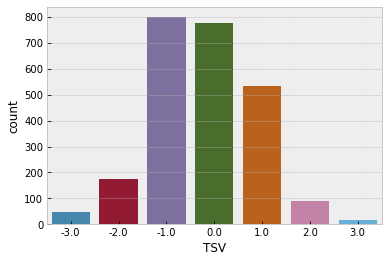

In [15]:
sns.countplot(x='TSV', data=data, order=data.TSV.unique().sort())

<AxesSubplot:xlabel='TSV', ylabel='count'>

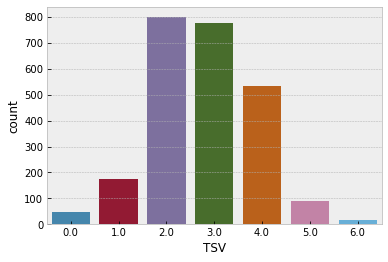

In [16]:
data.TSV.replace({-3 : 0,
                  -2 : 1,
                  -1 : 2,
                   0 : 3,
                   1 : 4,
                   2 : 5,
                   3 : 6}, inplace=True)

sns.countplot(x='TSV', data=data, order=data.TSV.unique().sort())

## Data Exploration

In [17]:
"""
Explore data on 3 section
1. Full Data --> all of parameter in dataset
2. Main Data --> only 6 parameter (ASHRAE-55)
3. Others Data --> exclude main parameter
"""
main_parameter = ["Ti", "RH", "Tmr", "Va", "met", "clo"]
target_label = ["TSV"]
others_parameter = []
for i in data.columns:
    if i not in (main_parameter+target_label):
        others_parameter.append(i)
            
full_data = data[main_parameter + others_parameter + target_label]
main_data = data[main_parameter + target_label]
others_data = data[others_parameter + target_label]

print(f"Full Data ({len(full_data.columns)-1} input parameters): {full_data.columns}")
print(f"Main Data ({len(main_data.columns)-1} input parameters): {main_data.columns}")
print(f"Others Data ({len(others_data.columns)-1} input parameters): {others_data.columns}")

Full Data (29 input parameters): Index(['Ti', 'RH', 'Tmr', 'Va', 'met', 'clo', 'month', 'season', 'sex', 'TP',
       'air_ts', 'air_tp', 'RH_ts', 'RH_tp', 'comfort', 'prod', 'TA', 'Uphols',
       'clo_tot', 'sh_sw', 'Tg', 'PMV', 'PPD', 'TnG_R_0.5', 'Top', 'Tout',
       'Trm', 'TnG_R_0.25', 'TnG_R_0.33', 'TSV'],
      dtype='object')
Main Data (6 input parameters): Index(['Ti', 'RH', 'Tmr', 'Va', 'met', 'clo', 'TSV'], dtype='object')
Others Data (23 input parameters): Index(['month', 'season', 'sex', 'TP', 'air_ts', 'air_tp', 'RH_ts', 'RH_tp',
       'comfort', 'prod', 'TA', 'Uphols', 'clo_tot', 'sh_sw', 'Tg', 'PMV',
       'PPD', 'TnG_R_0.5', 'Top', 'Tout', 'Trm', 'TnG_R_0.25', 'TnG_R_0.33',
       'TSV'],
      dtype='object')


### Statistic

In [18]:
full_data.describe()

,Ti,RH,Tmr,Va,met,clo,month,season,sex,TP,...,Tg,PMV,PPD,TnG_R_0.5,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33,TSV
count,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,...,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000
mean,20.751143,66.900357,21.544970,0.181730,1.111779,0.845556,6.082169,1.640920,1.571076,-0.275267,...,21.058069,-0.370420,31.460548,21.498228,21.059444,18.041304,18.138426,21.937012,21.724268,2.780608
std,4.986744,11.967743,6.061650,0.277182,0.117061,0.336807,3.520334,0.479829,0.495024,0.786124,...,5.248398,1.203898,25.879182,4.948298,5.270119,6.386078,6.475272,5.523757,5.140701,1.079047
min,8.200000,30.500000,8.119420,0.000000,0.700000,0.070000,1.000000,1.000000,1.000000,-2.000000,...,9.100000,-4.343513,5.000000,11.119614,9.119614,5.695017,7.312087,8.705920,10.368944,0.000000
25%,16.600000,60.300000,16.509329,0.100000,1.100000,0.580000,3.000000,1.000000,1.000000,-1.000000,...,16.500000,-1.221696,8.590282,17.784206,16.501453,13.200000,12.843523,18.631343,18.328465,2.000000
50%,20.200000,69.440000,21.064093,0.100000,1.100000,0.780000,6.000000,2.000000,2.000000,0.000000,...,20.700000,-0.525237,23.011926,20.693815,20.673266,17.107973,18.139126,21.370869,21.128767,3.000000
75%,23.775000,75.400000,24.965447,0.100000,1.100000,1.050000,9.000000,2.000000,2.000000,0.000000,...,24.400000,0.266625,48.745915,24.513932,24.296230,22.553654,21.568475,24.863393,24.722306,4.000000
max,32.500000,94.000000,47.004464,2.200000,3.000000,2.210000,12.000000,2.000000,2.000000,2.000000,...,34.400000,3.850433,99.999990,36.133242,34.895100,31.250000,31.508678,40.133242,38.193848,6.000000


In [19]:
main_data.describe()

,Ti,RH,Tmr,Va,met,clo,TSV
count,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000
mean,20.751143,66.900357,21.544970,0.181730,1.111779,0.845556,2.780608
std,4.986744,11.967743,6.061650,0.277182,0.117061,0.336807,1.079047
min,8.200000,30.500000,8.119420,0.000000,0.700000,0.070000,0.000000
25%,16.600000,60.300000,16.509329,0.100000,1.100000,0.580000,2.000000
50%,20.200000,69.440000,21.064093,0.100000,1.100000,0.780000,3.000000
75%,23.775000,75.400000,24.965447,0.100000,1.100000,1.050000,4.000000
max,32.500000,94.000000,47.004464,2.200000,3.000000,2.210000,6.000000


In [20]:
others_data.describe()

,month,season,sex,TP,air_ts,air_tp,RH_ts,RH_tp,comfort,prod,...,Tg,PMV,PPD,TnG_R_0.5,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33,TSV
count,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,...,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000
mean,6.082169,1.640920,1.571076,-0.275267,-0.368529,-0.113804,-0.258833,-0.077239,2.677075,0.056286,...,21.058069,-0.370420,31.460548,21.498228,21.059444,18.041304,18.138426,21.937012,21.724268,2.780608
std,3.520334,0.479829,0.495024,0.786124,1.082770,0.743647,1.054795,0.679534,0.894836,0.672790,...,5.248398,1.203898,25.879182,4.948298,5.270119,6.386078,6.475272,5.523757,5.140701,1.079047
min,1.000000,1.000000,1.000000,-2.000000,-3.000000,-2.000000,-3.000000,-2.000000,0.000000,-2.000000,...,9.100000,-4.343513,5.000000,11.119614,9.119614,5.695017,7.312087,8.705920,10.368944,0.000000
25%,3.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,2.000000,0.000000,...,16.500000,-1.221696,8.590282,17.784206,16.501453,13.200000,12.843523,18.631343,18.328465,2.000000
50%,6.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,20.700000,-0.525237,23.011926,20.693815,20.673266,17.107973,18.139126,21.370869,21.128767,3.000000
75%,9.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,24.400000,0.266625,48.745915,24.513932,24.296230,22.553654,21.568475,24.863393,24.722306,4.000000
max,12.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,6.000000,2.000000,...,34.400000,3.850433,99.999990,36.133242,34.895100,31.250000,31.508678,40.133242,38.193848,6.000000


#### Outlier Analysis

<AxesSubplot:title={'center':'Full Data Boxplot'}>

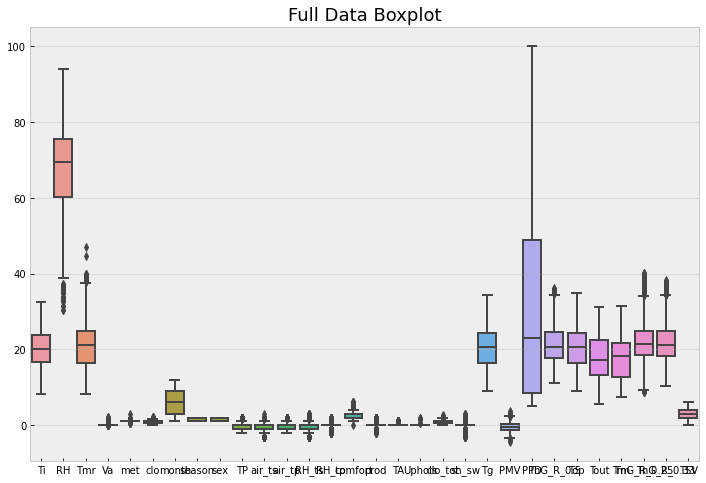

In [21]:
plt.figure(figsize=(12,8))
plt.title("Full Data Boxplot", size=18)
sns.boxplot(data=full_data)

<AxesSubplot:title={'center':'Main Data Boxplot'}>

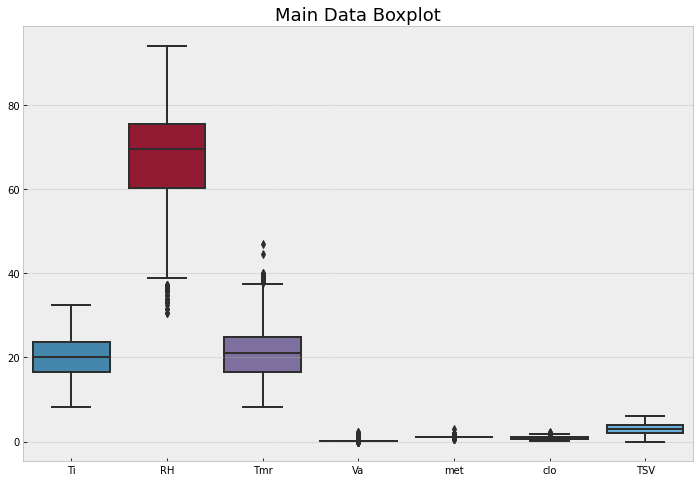

In [22]:
plt.figure(figsize=(12,8))
plt.title("Main Data Boxplot", size=18)
sns.boxplot(data=main_data)

<AxesSubplot:title={'center':'Others Data Boxplot'}>

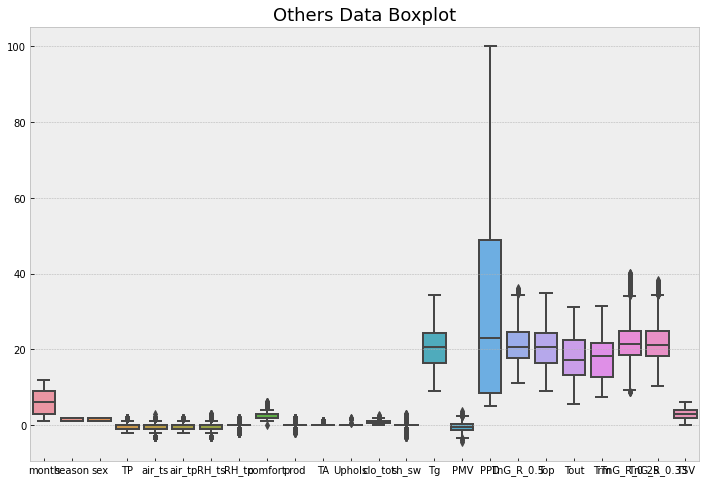

In [23]:
plt.figure(figsize=(12,8))
plt.title("Others Data Boxplot", size=18)
sns.boxplot(data=others_data)

### Correation Matrix

#### Full

<AxesSubplot:>

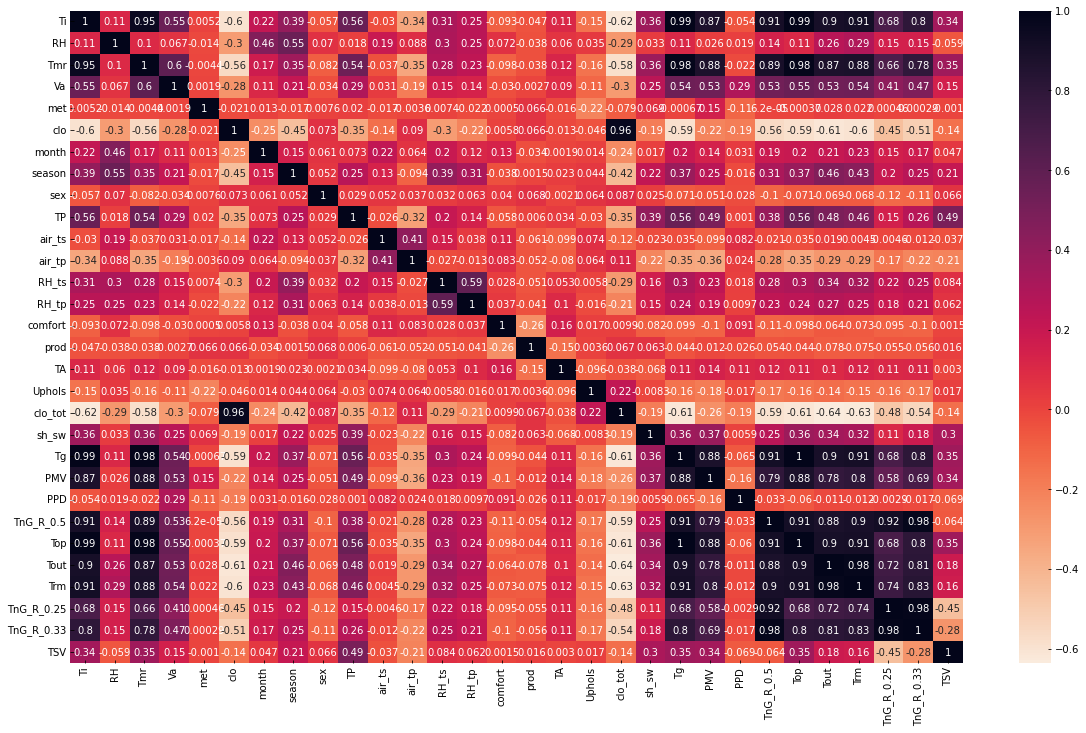

In [24]:
plt.figure(figsize=(20,12))
cor = full_data.corr()
sns.heatmap(cor,annot=True,cmap='rocket_r')

In [25]:
#Correlation with output variable
cor_target = abs(cor["TSV"])

#Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.5]
relevant_features = cor_target[cor_target>0.3]
relevant_features

Ti            0.336710
Tmr           0.353391
TP            0.489386
sh_sw         0.304330
Tg            0.348942
PMV           0.338905
Top           0.349318
TnG_R_0.25    0.448108
TSV           1.000000
Name: TSV, dtype: float64

#### Main

<AxesSubplot:>

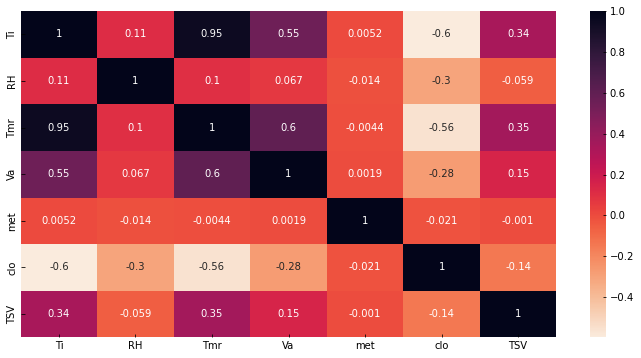

In [26]:
plt.figure(figsize=(12,6))
cor = main_data.corr()
sns.heatmap(cor,annot=True,cmap='rocket_r')

In [27]:
#Correlation with output variable
cor_target = abs(cor["TSV"])

#Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.5]
relevant_features = cor_target[cor_target>0.3]
relevant_features

Ti     0.336710
Tmr    0.353391
TSV    1.000000
Name: TSV, dtype: float64

#### Others

<AxesSubplot:>

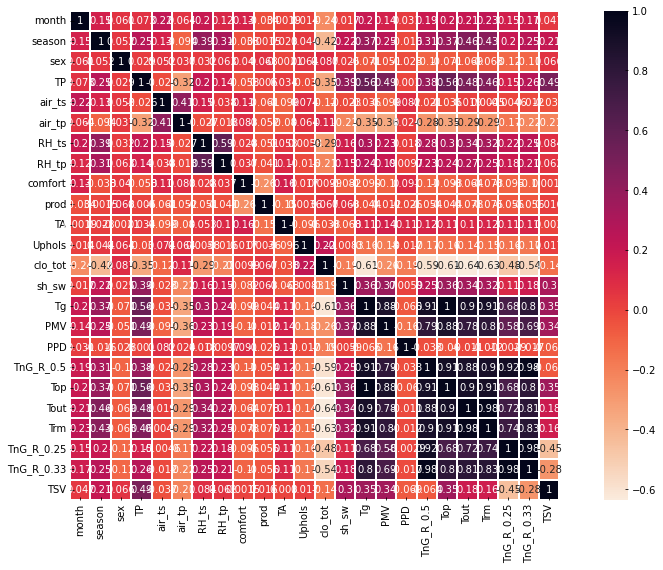

In [28]:
plt.figure(figsize=(16,9))
cor = others_data.corr()
sns.heatmap(cor,annot=True,cmap='rocket_r', linewidths=0.1, square=True)

In [29]:
#Correlation with output variable
cor_target = abs(cor["TSV"])

#Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.5]
relevant_features = cor_target[cor_target>0.3]
relevant_features

TP            0.489386
sh_sw         0.304330
Tg            0.348942
PMV           0.338905
Top           0.349318
TnG_R_0.25    0.448108
TSV           1.000000
Name: TSV, dtype: float64

# Classification

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.inspection import permutation_importance

from datetime import datetime as dt
import time

In [31]:
start = dt.now()
# process stuff
running_secs = (dt.now() - start).seconds

## Standarization

In [32]:
renamed_column = {'month' : 'Month',
                 'season' : 'Season',
                 'sex' : 'Sex',
                 'TSV' : 'Thermal Sensation Vote',
                 'TP' : 'Thermal Preference Vote',
                 'air_ts' : 'Air Sensation Vote',
                 'air_tp' : 'Air Preference Vote',
                 'RH_ts' : 'RH Sensation Vote',
                 'RH_tp' : 'RH Preference Vote',
                 'comfort' : 'Comfortability',
                 'prod' : 'Productivity',
                 'TA' : 'Thermal Acceptibility',
                 'clo' : 'Clothing Insulation',
                 'Uphols' : 'Upholerstery',
                 'clo_tot' : 'Clothing Instulation Total',
                 'met' : 'Metabolism Level',
                 'sh_sw' : 'Sweating/Shivering',
                 'Ti' : 'Indoor Air Temperature',
                 'Tg' : 'Indoor Globe Temperature',
                 'Va' : 'Air Movement',
                 'RH' : 'Relative Humidity',
                 'PMV' : 'Predicted Mean Vote',
                 'PPD' : 'Percentage Peaple Dissatified',
                 'TnG_R_0.5' : "Griffith's Neutral Temp (R-0.50)",
                 'Tmr' : 'Mean Radiant Temperature',
                 'Top' : 'Indoor Operative Temperature',
                 'Tout' : 'Outdoor Mean Temperature',
                 'Trm' : 'Outdoor Running Mean Temperature',
                 'TnG_R_0.25' : "Griffith's Neutral Temp (R-0.25)",
                 'TnG_R_0.33' : "Griffith's Neutral Temp (R-0.33)"}

In [33]:
scaler = StandardScaler()

#Full data
y_full = full_data[['TSV']].values.ravel()
X_full = full_data.drop(['TSV'], axis=1)

full_features = X_full.columns
X_full = pd.DataFrame(scaler.fit_transform(X_full),columns = full_features)

#Main data
y_main = main_data[['TSV']].values.ravel()
X_main = main_data.drop(['TSV'], axis=1)

main_features = X_main.columns
X_main = pd.DataFrame(scaler.fit_transform(X_main),columns = main_features)


#Others data
y_others = others_data[['TSV']].values.ravel()
X_others = others_data.drop(['TSV'], axis=1)

others_features = X_others.columns
X_others = pd.DataFrame(scaler.fit_transform(X_others),columns = others_features)

In [34]:
# X_full.rename(columns=renamed_column, inplace=True)
# X_full.columns

## Splitting Data

In [35]:
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

print(X_full_train.shape, X_full_test.shape)
print(y_full_train.shape, y_full_test.shape)

(1703, 29) (731, 29)
(1703,) (731,)


In [36]:
X_main_train, X_main_test, y_main_train, y_main_test = train_test_split(X_main, y_main, test_size=0.3, random_state=42)

print(X_main_train.shape, X_main_test.shape)
print(y_main_train.shape, y_main_test.shape)

(1703, 6) (731, 6)
(1703,) (731,)


In [37]:
X_others_train, X_others_test, y_others_train, y_others_test = train_test_split(X_others, y_others, test_size=0.3, 
                                                                                random_state=42)

print(X_others_train.shape, X_others_test.shape)
print(y_others_train.shape, y_others_test.shape)

(1703, 23) (731, 23)
(1703,) (731,)


## Modeling

In [38]:
# import sys
# !{sys.executable} -m pip install xgboost

In [91]:
def peformance_report(X_train, y_train, X_test, y_test, model):
    
    # training model
    print("Training model ")
    
    start_time = time.time()
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAccuracy = accuracy_score(y_train, y_pred)
    training_secs = (time.time() - start_time)
    
    print(f"  Training time : {training_secs} seconds")
    print(f"  Training accuracy : {trainAccuracy}\n")
    
    # testing model
    print("Testing model ")
    
    start_time = time.time()
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAccuracy = accuracy_score(y_test, y_pred)
    testing_secs = (time.time() - start_time)
    
    print(f"  Testing time : {testing_secs} seconds")
    print(f"  Testing accuracy : {testAccuracy}\n")
    
    # error
    error_rmse = mean_squared_error(y_test, y_pred, squared=False)
    error_mae = mean_absolute_error(y_test, y_pred)
    error_mape= mean_absolute_percentage_error(y_test, y_pred)   
    
    print(f"  RMSE  : {error_rmse}")
    print(f"  MAE   : {error_mae}")
    print(f"  MAPE  : {error_mape}")
          
    # report
    testReport = classification_report(y_test, y_pred)
    print(f"\nReport :\n{testReport}")
    
    return clf, y_pred

    
def confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(5,4), dpi=100)
    sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
    sns.heatmap(cm, cmap ='Blues', annot =True, fmt='g')

    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    # ax.set_xticklabels(labels=[-3,-2,-1,0,1,2,3])
    # ax.set_yticklabels(labels=[-3,-2,-1,0,1,2,3], rotation=0)
    ax.set_xticklabels(labels=["Cold", "Cool", "Slightly cool", "Neutral", "Slightly warm", "Warm", "Hot"], 
                       size=8, rotation=45)
    ax.set_yticklabels(labels=["Cold", "Cool", "Slightly cool", "Neutral", "Slightly warm", "Warm", "Hot"], 
                       size=8, rotation=0)

    
def importance(clf, X_data, a, b):
    X_new = X_data
    X_new.rename(renamed_column, axis='columns', inplace=True)
    features_name = X_new.columns
    
    fig, ax = plt.subplots(figsize=(a,b))
    results = pd.DataFrame({'Features': features_name,
                            'Importances': clf.feature_importances_})
    results.sort_values(by='Importances', inplace=True)
    ax = plt.barh(results['Features'], results['Importances'])
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=15)
    # plt.xlabel('Importance percentages')
    # ax.set_title('Feature Importance')
    # plo.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()
    return results
  

### SVM

In [92]:
model = SVC()

#### Full Data

In [93]:
clf_full, y_full_pred = peformance_report(X_full_train, y_full_train, X_full_test, y_full_test, model)

Training model 
  Training time : 0.5299985408782959 seconds
  Training accuracy : 0.9653552554315913

Testing model 
  Testing time : 0.2949984073638916 seconds
  Testing accuracy : 0.9015047879616963

  RMSE  : 0.3328770246548891
  MAE   : 0.10259917920656635
  MAPE  : 73930500038913.8

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.14      0.25        14
         1.0       0.75      0.70      0.72        60
         2.0       0.92      0.98      0.95       233
         3.0       0.98      0.99      0.98       223
         4.0       0.82      0.99      0.90       165
         5.0       1.00      0.09      0.17        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.90       731
   macro avg       0.78      0.56      0.57       731
weighted avg       0.91      0.90      0.88       731



C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


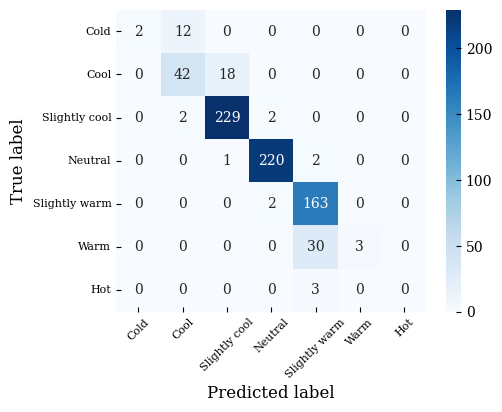

In [94]:
confusion(y_full_test, y_full_pred)

In [95]:
# result = importance(clf_full, full_features, 16, 12)

#### Main Data

In [96]:
clf_main, y_main_pred = peformance_report(X_main_train, y_main_train, X_main_test, y_main_test, model)

Training model 
  Training time : 0.5610029697418213 seconds
  Training accuracy : 0.48150322959483266

Testing model 
  Testing time : 0.34662461280822754 seconds
  Testing accuracy : 0.4473324213406293

  RMSE  : 1.1034084737384975
  MAE   : 0.7523939808481532
  MAPE  : 215630625113498.72

Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.00      0.00      0.00        60
         2.0       0.46      0.62      0.53       233
         3.0       0.42      0.60      0.50       223
         4.0       0.48      0.30      0.37       165
         5.0       0.00      0.00      0.00        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.45       731
   macro avg       0.19      0.22      0.20       731
weighted avg       0.38      0.45      0.40       731



C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


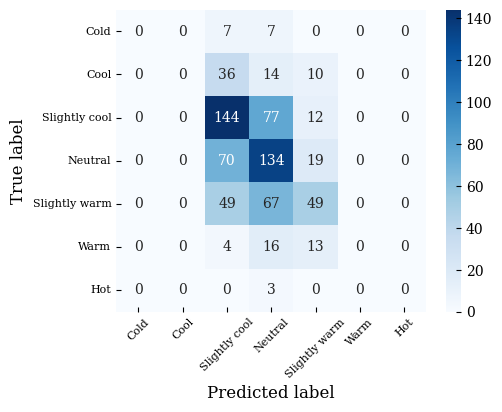

In [97]:
confusion(y_main_test, y_main_pred)

#### Others Data

In [98]:
clf_others, y_others_pred = peformance_report(X_others_train, y_others_train, X_others_test, y_others_test, model)

Training model 
  Training time : 1.2223236560821533 seconds
  Training accuracy : 0.9618320610687023

Testing model 
  Testing time : 0.4840059280395508 seconds
  Testing accuracy : 0.8987688098495212

  RMSE  : 0.3429971702850177
  MAE   : 0.106703146374829
  MAPE  : 86252250045399.42

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.07      0.13        14
         1.0       0.73      0.62      0.67        60
         2.0       0.90      0.99      0.94       233
         3.0       0.99      0.99      0.99       223
         4.0       0.83      0.99      0.91       165
         5.0       1.00      0.12      0.22        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.90       731
   macro avg       0.78      0.54      0.55       731
weighted avg       0.90      0.90      0.87       731



C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


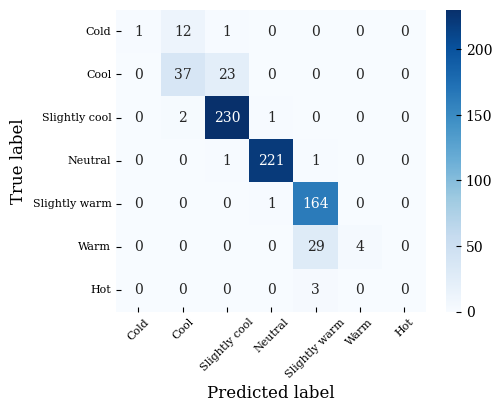

In [99]:
confusion(y_others_test, y_others_pred)

### XGBoost

In [100]:
from xgboost import XGBClassifier

In [101]:
model = XGBClassifier()

#### Full Data

In [102]:
clf_full, y_full_pred = peformance_report(X_full_train, y_full_train, X_full_test, y_full_test, model)

Training model 
  Training time : 1.5581178665161133 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 2.8296334743499756 seconds
  Testing accuracy : 0.9712722298221614

  RMSE  : 0.1921866397915419
  MAE   : 0.03146374829001368
  MAPE  : 24643500012971.26

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.95      0.90      0.92        60
         2.0       0.97      1.00      0.98       233
         3.0       1.00      0.99      0.99       223
         4.0       0.96      1.00      0.98       165
         5.0       0.93      0.79      0.85        33
         6.0       0.33      0.33      0.33         3

    accuracy                           0.97       731
   macro avg       0.88      0.83      0.85       731
weighted avg       0.97      0.97      0.97       731



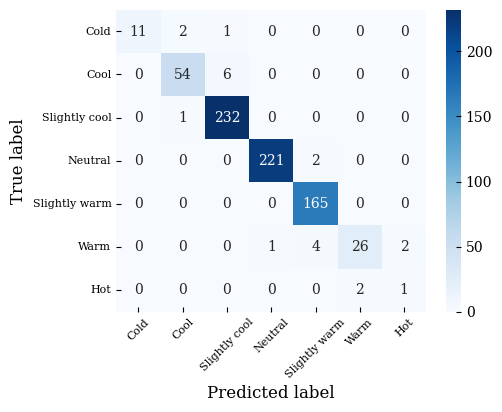

In [103]:
confusion(y_full_test, y_full_pred)

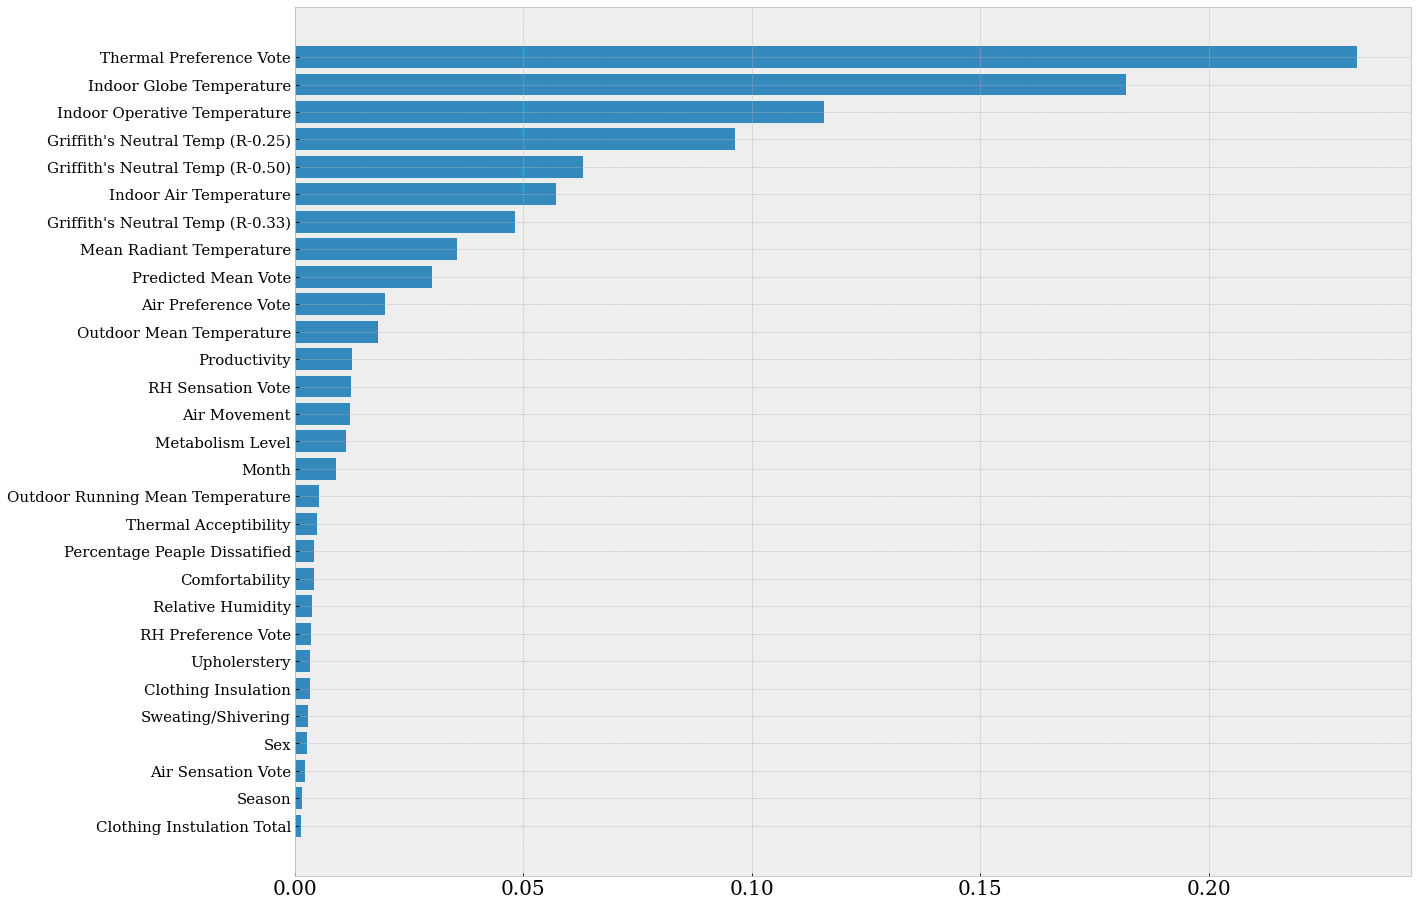

In [104]:
result = importance(clf_full, X_full, 20, 16)

In [105]:
result = result.sort_values(by=['Importances'], ascending=False)
result = result.iloc[:20]

importance_features = result['Features'].tolist()
print(importance_features)

['Thermal Preference Vote', 'Indoor Globe Temperature', 'Indoor Operative Temperature', "Griffith's Neutral Temp (R-0.25)", "Griffith's Neutral Temp (R-0.50)", 'Indoor Air Temperature', "Griffith's Neutral Temp (R-0.33)", 'Mean Radiant Temperature', 'Predicted Mean Vote', 'Air Preference Vote', 'Outdoor Mean Temperature', 'Productivity', 'RH Sensation Vote', 'Air Movement', 'Metabolism Level', 'Month', 'Outdoor Running Mean Temperature', 'Thermal Acceptibility', 'Percentage Peaple Dissatified', 'Comfortability']


#### Main Data

In [106]:
clf_main, y_main_pred = peformance_report(X_main_train, y_main_train, X_main_test, y_main_test, model)

Training model 
  Training time : 2.1094839572906494 seconds
  Training accuracy : 0.9706400469759249

Testing model 
  Testing time : 0.9411389827728271 seconds
  Testing accuracy : 0.48700410396716826

  RMSE  : 1.0571882797418488
  MAE   : 0.6935704514363885
  MAPE  : 129378375068099.34

Report :
              precision    recall  f1-score   support

         0.0       0.44      0.29      0.35        14
         1.0       0.38      0.22      0.28        60
         2.0       0.51      0.57      0.54       233
         3.0       0.47      0.55      0.51       223
         4.0       0.52      0.48      0.50       165
         5.0       0.30      0.09      0.14        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.49       731
   macro avg       0.38      0.31      0.33       731
weighted avg       0.48      0.49      0.48       731



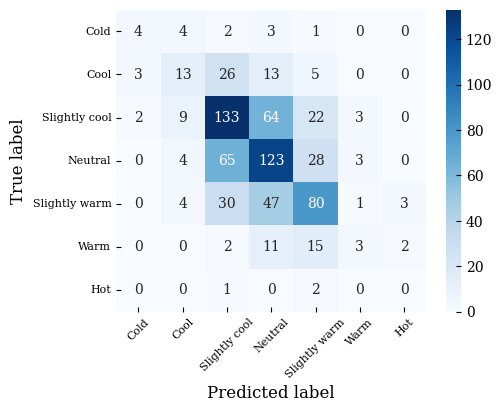

In [107]:
confusion(y_main_test, y_main_pred)

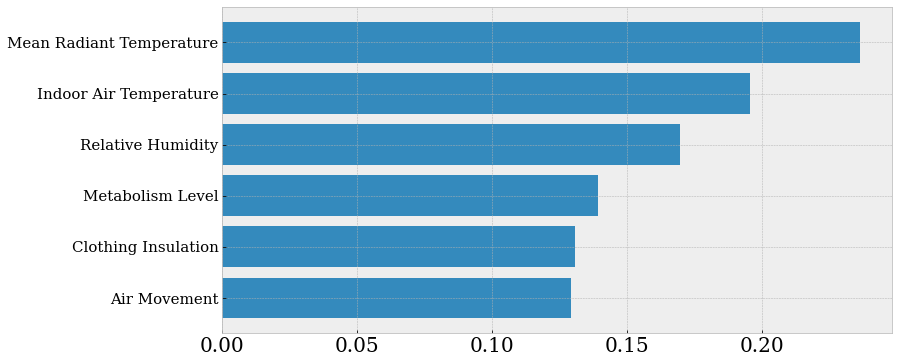

In [108]:
result = importance(clf_main, X_main, 12, 6)

#### Others Data

In [109]:
clf_others, y_others_pred = peformance_report(X_others_train, y_others_train, X_others_test, y_others_test, model)

Training model 
  Training time : 1.143568515777588 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 3.0530426502227783 seconds
  Testing accuracy : 0.9699042407660738

  RMSE  : 0.1849316803638273
  MAE   : 0.03146374829001368
  MAPE  : 18482625009728.45

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.93      0.90      0.92        60
         2.0       0.97      1.00      0.98       233
         3.0       0.99      0.99      0.99       223
         4.0       0.96      0.99      0.98       165
         5.0       0.93      0.82      0.87        33
         6.0       0.50      0.33      0.40         3

    accuracy                           0.97       731
   macro avg       0.90      0.83      0.86       731
weighted avg       0.97      0.97      0.97       731



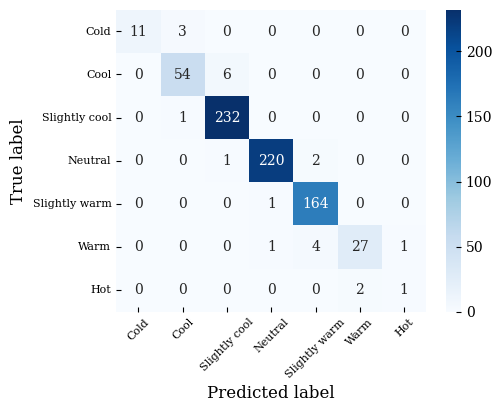

In [110]:
confusion(y_main_test, y_others_pred)

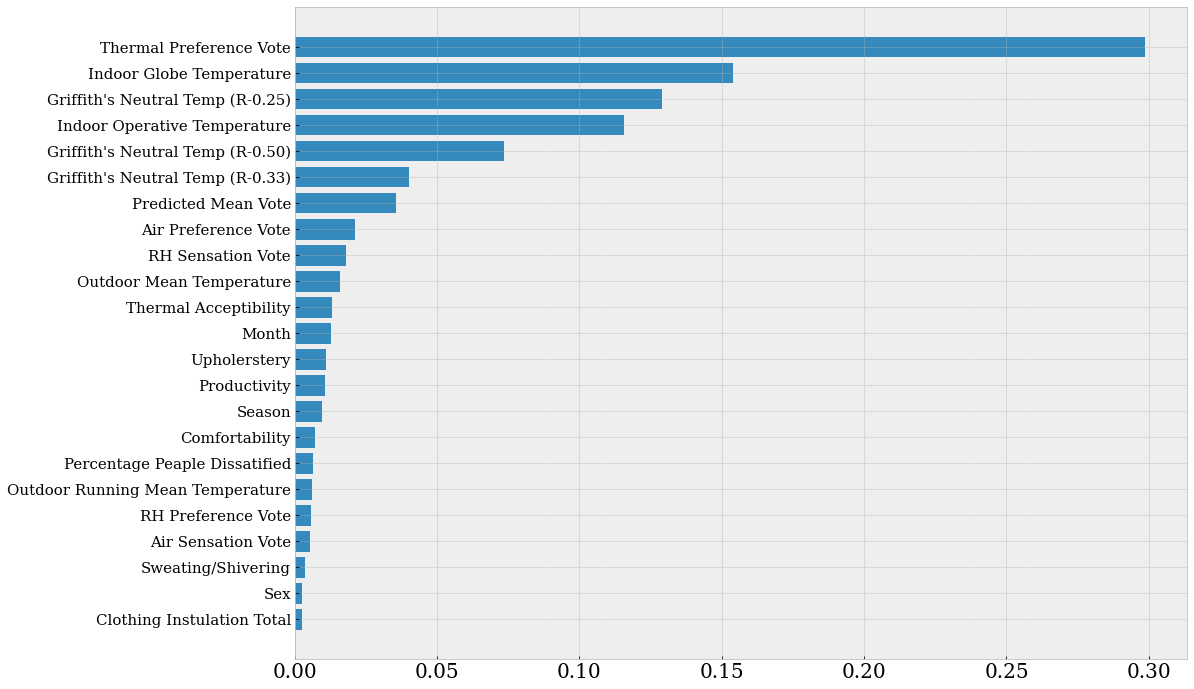

,Features,Importances
12,Clothing Instulation Total,0.002637
2,Sex,0.002763
13,Sweating/Shivering,0.003824
4,Air Sensation Vote,0.005567
7,RH Preference Vote,0.005665
20,Outdoor Running Mean Temperature,0.006142
16,Percentage Peaple Dissatified,0.006566
8,Comfortability,0.007067
1,Season,0.009634
9,Productivity,0.010680


In [111]:
importance(clf_others, X_others, 16, 12)

### XGBoost (21 Importance Features)

In [112]:
#Selected data
full_data_renamed = full_data
full_data_renamed.rename(renamed_column, axis='columns', inplace=True)
y_important = full_data_renamed[['Thermal Sensation Vote']].values.ravel()
X_important = full_data_renamed[importance_features]

# full_features = X_full.columns
X_important = pd.DataFrame(scaler.fit_transform(X_important),columns = importance_features)


X_important_train, X_important_test, y_important_train, y_important_test = train_test_split(X_important, 
                                                                                            y_important, 
                                                                                            test_size=0.3, 
                                                                                            random_state=42)

print(X_important_train.shape, X_important_test.shape)
print(y_important_train.shape, y_important_test.shape)

(1703, 20) (731, 20)
(1703,) (731,)


In [113]:
clf_important, y_important_pred = peformance_report(X_important_train, y_important_train, X_important_test, 
                                                    y_important_test, model)

Training model 
  Training time : 1.4861476421356201 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 0.9952192306518555 seconds
  Testing accuracy : 0.9753761969904241

  RMSE  : 0.15691973428978245
  MAE   : 0.024623803009575923
  MAPE  : 18482625009728.45

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.93      0.90      0.92        60
         2.0       0.97      1.00      0.99       233
         3.0       1.00      1.00      1.00       223
         4.0       0.97      1.00      0.99       165
         5.0       0.93      0.85      0.89        33
         6.0       0.50      0.33      0.40         3

    accuracy                           0.98       731
   macro avg       0.90      0.84      0.86       731
weighted avg       0.97      0.98      0.97       731



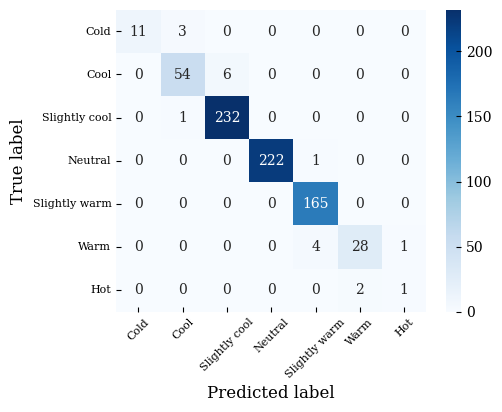

In [114]:
confusion(y_important_test, y_important_pred)

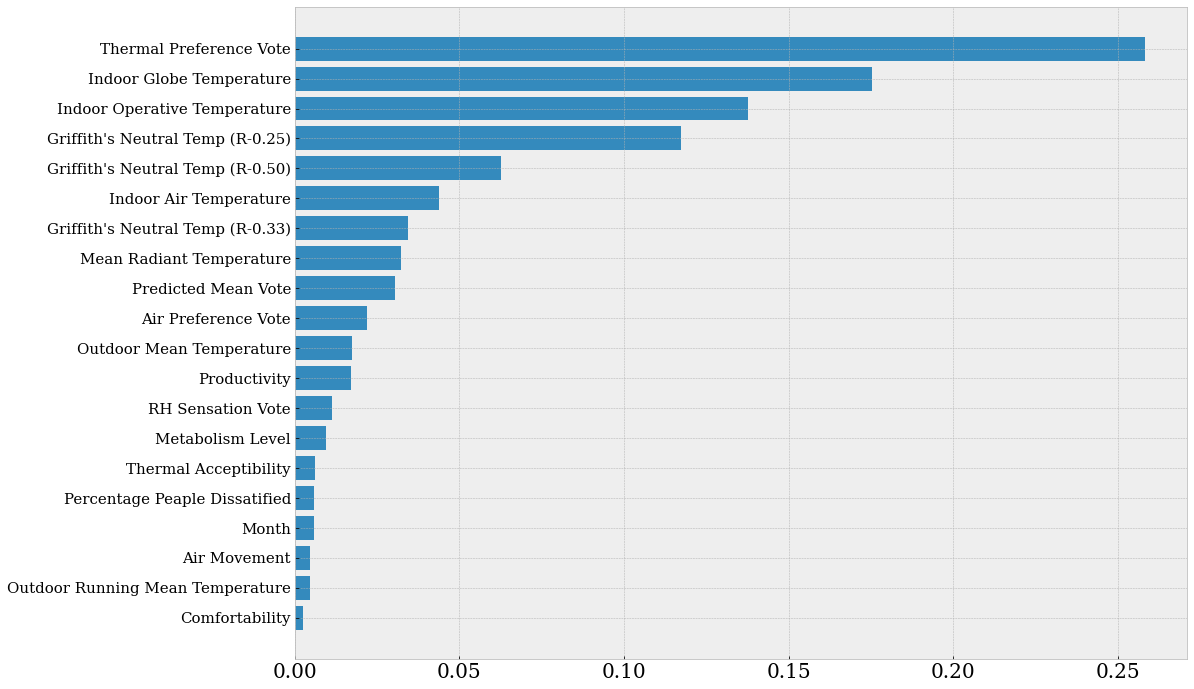

In [115]:
result = importance(clf_important, X_important, 16, 12)